Here is an overview of what I will cover:

- What are hyper-parameters and why are they important for machine learning models?
- What are some common methods and algorithms for hyper-parameter optimization?
- What are some challenges and best practices for hyper-parameter optimization?

## What are hyper-parameters and why are they important for machine learning models?

Hyper-parameters are configuration variables that are external to the model and whose value cannot be estimated from data. They are often used in processes to help estimate model parameters, which are internal to the model and whose value can be learned from data. Hyper-parameters can affect the performance, complexity, and generalization ability of machine learning models. For example, some common hyper-parameters are:

- The learning rate, which controls how much the model parameters are updated in each iteration of gradient descent.
- The number of hidden layers and units, which determine the architecture and capacity of neural networks.
- The regularization strength, which penalizes the model complexity and prevents overfitting.
- The kernel function and bandwidth, which define the similarity measure and smoothness of support vector machines.

Choosing appropriate values for hyper-parameters can be challenging, as they often depend on the data, the model, and the optimization objective. Therefore, hyper-parameter optimization (HPO) is the process of finding the optimal or near-optimal values for hyper-parameters that maximize the performance of machine learning models.

## What are some common methods and algorithms for hyper-parameter optimization?

There are many methods and algorithms for HPO, which can be broadly classified into three categories: grid search, random search, and Bayesian optimization.

- Grid search is the simplest and most widely used method, which involves evaluating the model performance on a predefined grid of hyper-parameter values. Grid search is easy to implement and parallelize, but it can be inefficient and wasteful, as it does not exploit the information from previous evaluations and may miss the optimal values if the grid is too coarse or too fine.
- Random search is a variation of grid search, which involves sampling the hyper-parameter values randomly from a predefined distribution. Random search can be more efficient and effective than grid search, as it can explore a larger and more diverse space of hyper-parameter values and avoid being stuck in local optima. However, random search still does not use the information from previous evaluations and may require a large number of samples to converge to the optimal values.
- Bayesian optimization is a more sophisticated and advanced method, which involves using a probabilistic model to capture the relationship between the hyper-parameter values and the model performance, and using an acquisition function to guide the search for the optimal values. Bayesian optimization can be more efficient and effective than grid search and random search, as it can exploit the information from previous evaluations and focus on the most promising regions of the hyper-parameter space. However, Bayesian optimization can be more complex and difficult to implement and tune, as it requires choosing a suitable probabilistic model and acquisition function.

## What are some challenges and best practices for hyper-parameter optimization?

HPO is a complex and important task in machine learning, which faces many challenges and requires many best practices. Some of the main challenges and best practices are:

- Defining the search space and the optimization objective. The search space should be large enough to include the optimal values, but not too large to make the search inefficient. The optimization objective should be aligned with the desired outcome, such as accuracy, F1-score, or AUC. It is also important to use a validation set or cross-validation to measure the model performance, and avoid using the test set to prevent overfitting and bias.
- Balancing the exploration and exploitation trade-off. Exploration means trying new and diverse hyper-parameter values, while exploitation means refining the existing and promising hyper-parameter values. A good balance between exploration and exploitation can help the search to find the optimal values faster and more reliably. Different methods and algorithms have different ways of balancing this trade-off, such as using different distributions, models, and acquisition functions.
- Handling the noise and uncertainty in the model performance. The model performance can vary due to the randomness in the data, the model, and the optimization process. This can introduce noise and uncertainty in the HPO, which can affect the reliability and robustness of the optimal values. To handle this, it is advisable to use multiple runs or repetitions, and report the mean and standard deviation of the model performance. It is also possible to use methods and algorithms that can account for the noise and uncertainty, such as Bayesian optimization with Gaussian processes.





To define the HPO problem formally, we can use the following notation:

- Let $\mathcal{M}$ be a machine learning model with a set of hyper-parameters $\Theta = \{\theta_1, \theta_2, ..., \theta_k\}$, where each $\theta_i$ can take values from a predefined domain $\mathcal{D}_i$.
- Let $\mathcal{D}$ be a dataset that consists of a training set $\mathcal{D}_{train}$, a validation set $\mathcal{D}_{val}$, and a test set $\mathcal{D}_{test}$.
- Let $f(\mathcal{M}, \Theta, \mathcal{D}_{train})$ be a function that returns the trained model parameters of $\mathcal{M}$ given the hyper-parameter values $\Theta$ and the training set $\mathcal{D}_{train}$.
- Let $g(\mathcal{M}, \Theta, \mathcal{D}_{val})$ be a function that returns the performance metric of $\mathcal{M}$ given the hyper-parameter values $\Theta$ and the validation set $\mathcal{D}_{val}$. The performance metric can be accuracy, F1-score, AUC, or any other suitable measure.

Then, the HPO problem can be formulated as:

$$\max_{\Theta \in \mathcal{D}_1 \times \mathcal{D}_2 \times ... \times \mathcal{D}_k} g(\mathcal{M}, \Theta, \mathcal{D}_{val})$$

This means that we want to find the optimal or near-optimal values of $\Theta$ that maximize the performance metric of $\mathcal{M}$ on the validation set. Note that we do not use the test set for HPO, as this would lead to overfitting and bias. The test set is only used to evaluate the final performance of the model with the optimal hyper-parameters.



# Grid search

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generating random data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Defining the model
def train_model(C, kernel):
    model = SVC(C=C, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Parameters for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Creating the model and grid search object
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=3)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.8625026986943013


# random search

In [2]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# Parameters for random search
param_dist = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf', 'poly']}

# Creating the model and random search object
svm_model = SVC()
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3)

# Fitting the random search to the data
random_search.fit(X_train, y_train)

# Best parameters and corresponding accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Parameters: {'kernel': 'linear', 'C': 0.01}
Best Accuracy: 0.8662480170463612


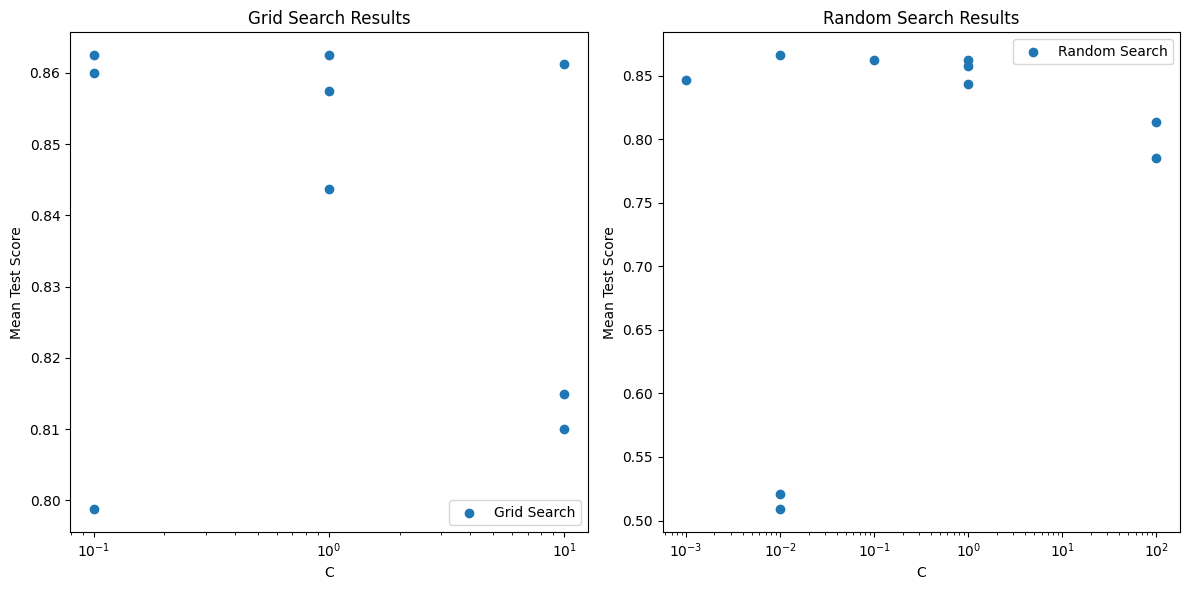

In [3]:
import matplotlib.pyplot as plt




# Extracting results
grid_results = grid_search.cv_results_
random_results = random_search.cv_results_

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting grid search results
plt.subplot(1, 2, 1)
plt.scatter(grid_results['param_C'], grid_results['mean_test_score'], label='Grid Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.legend()

# Plotting random search results
plt.subplot(1, 2, 2)
plt.scatter(random_results['param_C'], random_results['mean_test_score'], label='Random Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Random Search Results')
plt.legend()

plt.tight_layout()
plt.show()